In [1]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원) 
import matplotlib.pyplot as plt  # 그래프
import seaborn as sns

# 스케일링
from sklearn.preprocessing import *

# 데이터 분할
from sklearn.model_selection import train_test_split  

# 모델링
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, SVR

# 검증
from sklearn.metrics import *

# 성능
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import statsmodels.api as sm

# 1. Modeling

- 데이터로부터 패턴을 찾아 수학식으로 정리
- 오차가 적은 모델을 만드는 과정

### 목적
- 샘플을 가지고 전체를 추정

### 패턴을 찾는 방법 ( 머신러닝 알고리즘 )
	- 답이 있는 문제(지도학습) : 답을 알려주면서 패턴을 찾게하기. 숫자(회귀)와 범주(분류)의 답
	- 답이 없는 문제(비지도학습) : 비슷한 데이터끼리 모아서 데이터 안에서 패턴을 찾기



### 오차 : 실제 값 = 모델 + 오차
- 자료가 벗어나는 정도 ∑(실제 값 - 모델)^2




##### 평균
- 이탈도 : 관측 값과 모형의 차이

### 목표 : 오차의 최소화

# 2. Linear Regression

### 과정 : 데이터확인 및 전처리 -> 선언(설계) -> 학습(모델링) -> 검증(예측, 평가)

##### 데이터 확인 및 전처리

In [5]:
# 깃허브에 올려 놓은 예제 데이터를 가져와서 '데이터프레임'에 저장합니다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/advertising.csv'
data = pd.read_csv(path)

# 데이터프레임을 살짝 열어 봅니다.(상위 5개 행 조회)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


1) 데이터를 X와 y로 나누기
> * **X** : **features**, input, 조작변수, 요인, (독립변수)
> * **y** : **target**, output, 결과변수, label, (종속변수) 

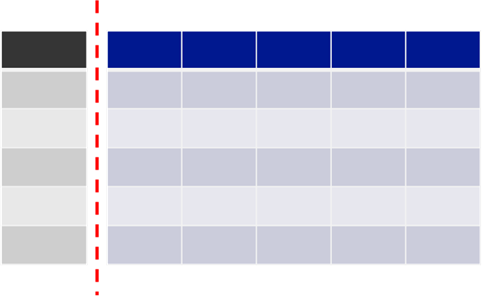

In [6]:
# 1) 먼저 x와 y로 분할
target = 'Sales'
x = data.drop(target, axis=1) # .drop(   , inplace = True)
y = data.loc[:, target] # : 처음부터 끝까지  data['Sales']

2. 데이터 train, validation 분리

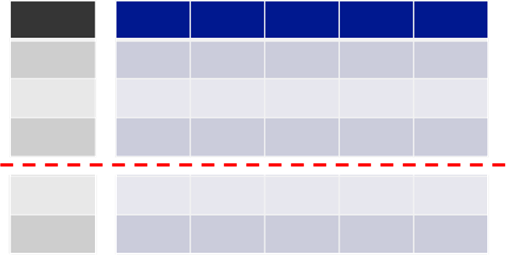

In [7]:
# 2) 전체에서 train : test = 7 : 3 으로 나눕니다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

##### 선언(설계)

In [8]:
# 알고리즘 불러오기 : 선형회귀
from sklearn.linear_model import LinearRegression

# 회귀 모델 평가 함수 불러오기
from sklearn.metrics import mean_absolute_error #평균 오차 의미

In [9]:
# 모델 선언 : 알고리즘을 어떻게 사용할지 설정
model = LinearRegression()

##### 학습

In [10]:
# 학습 : .fit   ==> 학습은 x와 y의 패턴을 찾아내는 과정입니다.
model.fit(x_train, y_train)

LinearRegression()

##### 검증(예측/평가)

1) 예측

In [14]:
pred = model.predict(x_test)
pred

array([24.19396049, 19.12986636, 12.4826001 , 17.14216039, 10.59587729,
       13.82334734, 12.80053862, 14.82462606, 16.34857047,  4.3408442 ,
       12.7149372 , 11.51162367,  9.73043167, 16.2454592 ,  6.67809292,
       19.29258861, 12.71368786, 10.07505702, 14.34236075,  5.70079193,
       12.09514938, 15.04540452,  9.62885121, 13.1721766 ,  9.97359504,
       14.86530968, 12.76051446, 23.26339042,  9.69021272,  8.07312433,
       15.02840605, 15.52931492, 14.01104775, 16.81218595, 17.76298947,
        8.90988994, 24.84362053, 12.0999319 , 14.26039044,  6.2715349 ,
       12.37727054, 23.28690023, 12.07367443, 16.72275206,  7.63999683,
       22.91577102,  8.66753811, 19.83600808, 18.56645858,  3.48408941,
       18.23306767, 19.1106743 , 15.39227713, 12.83114284, 18.69043696,
       13.37365818,  6.98827356, 17.32549755, 17.43604812, 19.14212243])

In [36]:
# 기울기(회귀계수)
model.coef_

array([10719.30670627,   483.86188093,   -39.84532359,  -342.7979994 ,
        5344.6536906 , -9455.63332121,   118.96952747,   410.03267944,
         522.72151155,   307.82467057,   -64.64680997,  -137.32563382,
        -461.4160821 ,  -834.58980956, -1401.65204197, -1845.48567121,
        5703.41165818,  3851.50746182,  3029.9583108 ,  4798.30982767,
        4460.96655763,  5261.88472966,  4950.34233068])

In [49]:
# 절편
model.intercept_

43.061640908221634

모델 = 기울기 * x + 절편

In [38]:
# train 점수
model.score(x_train, y_train)

0.917662802612522

In [40]:
# test 점수
model.score(x_test, y_test)

0.9122504288757546

In [41]:
model.rank_

23

2) 평가

In [15]:
# 평균 오차 (실제 값, 에측 값) - 학습 시 x의 구조와 예측 시 x 의 구조는 같아야 한다.
mean_absolute_error(y_test, pred)

1.133469913777749

### 실습 : Diamond Price

In [16]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/diamonds.csv'
data = pd.read_csv(path)
data = data.sample(2000, random_state=2022)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
50989,0.31,Ideal,G,VS2,61.6,55.0,544,4.37,4.39,2.70
42221,0.33,Ideal,E,IF,62.1,55.0,1289,4.43,4.46,2.76
42307,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
27207,2.02,Very Good,F,SI1,62.7,59.0,17530,7.97,8.03,5.02
22207,1.50,Good,H,VS1,63.4,59.0,10256,7.20,7.29,4.59


In [25]:
target = 'price'
x = data.drop(target, axis=1)
y = data[target]

In [27]:
y

50989      544
42221     1289
42307     1295
27207    17530
22207    10256
         ...  
42904     1362
14229     5766
26568    16273
19055     7839
5512      3848
Name: price, Length: 2000, dtype: int64

In [28]:
col_x = ['cut','color','clarity']
x = pd.get_dummies(x, columns=col_x, drop_first=True)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
pred = model.predict(x_test)
pred

array([ 3.14363152e+03,  9.30052122e+03,  4.00014038e+03,  5.86586693e+03,
        2.41527141e+03,  5.16560715e+03,  1.02412721e+03,  2.01218534e+03,
        5.76402636e+03,  8.18654186e+03,  5.96035668e+02,  5.07462125e+03,
        6.15433851e+03,  6.16522071e+02,  2.47219326e+03,  7.14338492e+03,
        1.30590930e+04,  5.61826089e+03,  5.18299046e+02, -4.98749523e+02,
        6.41832934e+03,  4.11232129e+03,  9.94880056e+02,  6.31769746e+03,
        6.44430853e+02,  3.46955104e+02,  7.75226827e+03,  1.44041336e+03,
       -6.72593198e+01,  2.11364125e+03,  1.61928678e+04,  5.13620762e+03,
        2.94003907e+03,  2.66408985e+03,  6.45038578e+03,  1.31071305e+03,
        5.34696051e+03,  4.62958797e+03,  5.03998037e+03,  3.74581210e+03,
        4.61228841e+03,  2.41198128e+03,  2.54885820e+03,  7.21587617e+03,
        1.39161176e+04,  1.17875143e+04,  7.93813955e+03,  3.12769448e+02,
        8.83720091e+03,  3.42732487e+03,  9.54388849e+02,  1.62034298e+03,
        9.66240597e+03,  

In [34]:
mean_absolute_error(y_test, pred)

840.9983174791433

### 실습 : 보스턴

In [42]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
cols = ['crim','indus','chas','nox','rm', 'dis', 'tax','ptratio','lstat','medv']
data = pd.read_csv(path, usecols = cols)
data.head()

,crim,indus,chas,nox,rm,dis,tax,ptratio,lstat,medv
0,0.00632,2.31,0,0.538,6.575,4.0900,296,15.3,4.98,24.0
1,0.02731,7.07,0,0.469,6.421,4.9671,242,17.8,9.14,21.6
2,0.02729,7.07,0,0.469,7.185,4.9671,242,17.8,4.03,34.7
3,0.03237,2.18,0,0.458,6.998,6.0622,222,18.7,2.94,33.4
4,0.06905,2.18,0,0.458,7.147,6.0622,222,18.7,5.33,36.2


In [43]:
target = 'medv'
x = data.drop(target, axis=1)
y = data[target]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [46]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
pred = model.predict(x_test)
pred

array([15.75440314, 30.52433888, 27.06646423, 11.86627218, 27.32435331,
       15.0990756 , 35.83180912, 18.25617674, 22.2072204 , 18.71928909,
       18.00866862, 23.10276566, 31.38548357, 19.23280265, 34.81058456,
       25.0041037 , 21.21034382, 22.6483805 , 19.90353221, 37.5063875 ,
       21.16718878, 18.48789011, 18.01174142, 17.03431048, 26.03466988,
       35.96516392, 12.56999168, 23.17525844, 23.67644702, 19.10636443,
       20.52788832, 24.72944709, 19.88643942,  7.06006695, 18.35183178,
       22.89136737, 37.22581792, 11.95534917, 23.81911947, 21.71332694,
       30.29595109, 24.58228176, 27.15980143, 24.14660684, 20.8640087 ,
       10.71191226, 38.49527332, 19.39870377, 22.31688347, 20.43635262,
       32.20900703, 39.32779018, 21.54608499, 37.87079595, 14.76407842,
       20.1200282 , 31.52856181, 23.2788469 , 34.54039744, 17.14759248,
       29.4022085 , 17.47933002, 19.8259621 , 30.11428112, 26.14557416,
       25.07638726, 21.14034772, 11.79608287, 29.34228185, 22.10

In [48]:
mean_absolute_error(y_test, pred)

3.687991137979064

### 데이터 분할 - train_test_split

train / validation / test

train_test_split : 데이터를 랜덤으로 스필릿 해주는 함수

<pre>train : 
validation : train과 함께 분할 병합을 반복하여 모델을 만들고 검증
test : 처음부터 분할 후 검토하지 않는 데이터. 최종 테스트용</pre>


In [84]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

In [85]:
# 학습에 사용할 변수를 지정합니다.
features = ['lstat']

# 지정된 변수로 데이터셋을 만듭니다. 
# 학습과 검증시 아래 데이터셋 이름을 사용합니다.
x_train1 = x_train[features]
x_val1 = x_val[features]

In [86]:
x_train1.head()

,lstat
257,5.12
371,9.53
253,3.54
332,7.83
454,18.71


In [87]:
# 회귀모델 평가용
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [88]:
model1 = LinearRegression()
model1.fit(x_train1, y_train)
pred1 = model1.predict(x_val1)
pred1

array([22.87821089, 12.34322304, 23.72024443, 28.88726844, 21.18457524,
       15.21379193, 27.55723819, 18.87855156,  9.18559725, 14.4483069 ,
       22.13186297, 25.96885673, 24.67710073, 16.48641081, 20.92622404,
       29.57620498,  4.06641605, 15.46257457, 27.605081  , 24.60055223,
       17.52938418, 16.82131052,  5.36774062, 30.15031876, 31.10717506,
       27.55723819, 29.71016486, 17.3954243 , 19.95023061, 30.17902445,
       25.22250882, 28.67676006, 12.58243711, 20.22771894, 15.75920003,
       15.24249762,  1.40635554, 16.35245093, 17.6537755 , 29.61447923,
       11.33852392, 18.30443778, 19.96936774,  8.47752359, 17.32844436,
       30.06420169, 23.67240162, 12.43890867, 16.14194254, 15.10853774,
       23.84463575, 12.0944404 , 27.16492711, 27.47112112, 25.7966226 ,
       23.07915071, 25.91144535, 28.73417144, 27.8634322 , 19.17517701,
       18.15134077, 15.74963146, 17.11793597, 30.37039571, 27.605081  ,
       18.31400634, 30.41823852, 23.15569921, 25.63395703, 18.44

In [89]:
# 평균오차
mean_absolute_error(y_val   , pred1   )

4.138380487348265

### R2 Score

In [90]:
# 실제와 예측 데이터 5건씩 저장
tmp_y = y_val
tmp_p = pred1

# 실제값의 평균오차 저장
tmp_y_mean = tmp_y.mean()
tmp_y_mean

21.28092105263158

In [91]:
# SST : 평균 모델과 실제 값의 차이
sst = np.sum(np.power(tmp_y - tmp_y_mean, 2))
sst

13020.754671052631

In [92]:
# SSE : 회귀 모델과 실제 값의 차이
sse = np.sum(np.power(tmp_y - tmp_p, 2))
sse

4797.625819131855

In [93]:
# SSR : 회귀 모델과 평균 모델의 차이
ssr = np.sum(np.power(tmp_p - tmp_y_mean, 2))
ssr

8605.887559451967

In [94]:
# R2 Score = 1- SSE/SST
1 - (sse/sst)

0.6315401111275217

In [95]:
r2_score(y_val, pred1)

0.6315401111275217

##### 오차의 양과 율

In [96]:
# MSE : 오차 제곱 평균
mean_squared_error( y_val   , pred1   )

31.563327757446412

In [97]:
# RMSE : 오차 제곱 평균의 루트
mean_squared_error( y_val   , pred1  , squared = False)

5.618124932523877

In [98]:
# MAE : 오차 절대값 평균
mean_absolute_error(y_val   , pred1   )

4.138380487348265

In [99]:
# MAPE : 오차 절대값 평균율
mean_absolute_percentage_error(y_val   , pred1  )

0.22398686231166276

In [100]:
# 1 - MAPE : 회귀모델의 정확도
1 -  mean_absolute_percentage_error(y_val   , pred1   )

0.7760131376883372

### 연습문제

In [101]:
# 학습에 사용할 변수를 지정합니다.
features = [['rm'], ['crim']]
model2 = LinearRegression()
for f in features:
    print(f)
    x_train2 = x_train[f]
    x_val2 = x_val[f]
    
    model2.fit(x_train2, y_train)
    
    print('회귀계수 : ', model2.coef_)
    print('절편 : ', model2.intercept_)
    print(f'medv = {model2.coef_}*crim + {model2.intercept_}')
    print()
    
    pred2 = model2.predict(x_val2)
    print(f'pred2 : {pred2}')
    print()
    print(f'mean_absolute_error : {mean_absolute_error(y_val, pred2)}')
    print()
    
    tmp_mean = y_val.mean()
    sst = np.sum(np.power(y_val - tmp_mean, 2))
    print(f'sst : {sst}')
    
    sse = np.sum(np.power(y_val - pred2, 2))
    print(f'sse : {sse}')
    
    print(f'r2_score : {r2_score(y_val, pred2)}')
    print()
    
    print(f'mse : {mean_squared_error(y_val, pred2)}')
    print(f'rmse : {mean_squared_error(y_val, pred2, squared=False)}')
    print(f'mae : {mean_absolute_error(y_val, pred2)}')
    print(f'mape : {mean_absolute_percentage_error(y_val, pred2)}')
    print('-----' * 20)
    
    

['rm']
회귀계수 :  [9.51840075]
절편 :  -36.98251509832555
medv = [9.51840075]*crim + -36.98251509832555

pred2 : [21.71746233  2.40462721 19.22364134 32.18770316 16.77741234 21.04165588
 22.13627197 16.31101071 13.50308249 14.32166495 22.30760318 18.92857091
 22.5455632  19.89944779 18.89049731 31.04549507 10.60948866 12.08484077
 24.98227379 20.26114702 19.66148777 18.56687169  4.59385938 33.05387763
 26.62895712 41.99165593 23.8686209  18.06239645 24.23032013 26.12448188
 19.75667178 26.58136512 13.88381852 16.02545868 13.93141052 23.97332331
  9.71475899 21.76505434 23.37366406 46.5890435  19.13797573 17.39610839
 18.90953411 15.66375946 21.88879355 31.12164228 17.31996119 26.3053315
 23.98284171 23.71632649 23.95428651 15.71135146 30.48390943 28.20901165
 25.52482263 10.72370947 21.15587669 22.13627197 -3.08749002 16.33956591
 22.95485443 28.23756685 17.28188758 27.05728516 25.35349142 20.16596301
 30.93127426 21.80312794 21.49853912 23.31655366  9.46728057 16.05401389
 27.5712788  22.3

### 다중회귀

In [102]:
features = ['lstat', 'ptratio']
x_train3 = x_train[features]
x_val3 = x_val[features]

In [110]:
model3 = LinearRegression()
model3.fit(x_train3, y_train)

print(f'회귀계수 : {model3.coef_}')
print(f'편차 : {model3.intercept_}')
print()
pred3 = model3.predict(x_val3)
print(f'pred3 : {pred3}')
print()
tmp_mean = y_val.mean()
sst = np.sum(np.power(y_val - tmp_mean, 2))
sse = np.sum(np.power(y_val - pred3, 2))

print(f'sst : {sst}')
print(f'sse : {sse}')
print(f'r2_score : {r2_score(y_val, pred3)}')
print()

print(f'mse : {mean_squared_error(y_val, pred3)}')
print(f'rmse : {mean_squared_error(y_val, pred3, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred3)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred3)}')

회귀계수 : [-0.82877003 -1.25776375]
편차 : 56.23176330467861

pred3 : [19.72576653 11.48144318 21.33551878 29.08106266 19.13927821 12.96154226
 27.5517432  16.13573145  8.7465021  14.56250098 19.95976054 25.16977396
 25.1829218  15.07001739 20.29905043 28.29423696  4.31258246 14.18323346
 31.6180257  23.85885645 20.75287896 14.47965227  5.4397097  30.42659185
 27.73362338 33.71478558 31.05156864 17.86977091 16.81240113 28.1874802
 23.89445147 30.91115526 13.70105769 19.56827194 14.44015217 13.99261636
  2.00860179 21.24280833 16.08111682 26.44074214 10.61123465 16.64468044
 21.10537328  8.13321228 15.79933501 29.84889705 23.55805503 11.56432018
 14.77166018 20.1654073  28.3609595  11.26596297 30.48213324 26.84827203
 25.39792448 27.69794348 24.61694226 28.19380121 24.92409299 20.29171778
 16.51207723 14.43186447 14.61079461 31.12031445 29.98293283 22.94178688
 31.16175295 23.86517746 26.01169183 15.51123219  5.4479974  23.1782534
  9.45095662 22.62446664 25.76845507  1.04919525  6.35281759 

In [107]:
features = ['lstat', 'ptratio', 'crim']
x_train4 = x_train[features]
x_val4 = x_val[features]

In [108]:
model4= LinearRegression()
model4.fit(x_train4, y_train)

print(f'회귀계수 : {model4.coef_}')
print(f'편차 : {model4.intercept_}')
print()
pred4 = model4.predict(x_val4)
print(f'pred4 : {pred4}')
print()
tmp_mean = y_val.mean()
sst = np.sum(np.power(y_val - tmp_mean, 2))
sse = np.sum(np.power(y_val - pred4, 2))

print(f'sst : {sst}')
print(f'sse : {sse}')
print(f'r2_score : {r2_score(y_val, pred4)}')
print()

print(f'mse : {mean_squared_error(y_val, pred4)}')
print(f'rmse : {mean_squared_error(y_val, pred4, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred4)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred4)}')

회귀계수 : [-0.82488373 -1.252952   -0.00844337]
편차 : 56.12327702981514

pred4 : [19.76458518 11.38594594 21.32789863 29.07989137 19.08105871 13.01953235
 27.55695578 16.18535769  8.61971811 14.62611139 19.8783963  25.18592458
 25.19949491 15.09318631 20.33773215 28.29586138  4.23482053 14.00802996
 31.59695993 23.88149094 20.7920132  14.54280435  5.37787383 30.41589066
 27.68895666 33.69288297 31.04205019 17.91884204 16.86298633 28.18933992
 23.91540694 30.90293218 13.76812565 19.60935285 14.29628549 13.97923801
  2.03864958 21.28066272 16.08587262 26.42067713 10.56081816 16.64110206
 21.14116599  7.8776839  15.77973571 29.84402329 23.58065647 11.51426659
 14.78606894 20.20763553 28.34651655 11.26882125 30.47769768 26.85716935
 25.41092196 27.69777971 24.63308959 28.19677996 24.90200764 20.33046422
 16.52492647 14.37553863 14.66494422 31.11097199 29.97970072 22.97145915
 31.15221035 23.88802037 26.02499863 15.56595706  5.43468215 23.20555704
  9.44841813 22.65363812 25.78011621  1.1626942

In [111]:
model5= LinearRegression()
model5.fit(x_train, y_train)

print(f'회귀계수 : {model5.coef_}')
print(f'편차 : {model5.intercept_}')
print()
pred5 = model5.predict(x_val)
print(f'pred4 : {pred4}')
print()
tmp_mean = y_val.mean()
sst = np.sum(np.power(y_val - tmp_mean, 2))
sse = np.sum(np.power(y_val - pred5, 2))

print(f'sst : {sst}')
print(f'sse : {sse}')
print(f'r2_score : {r2_score(y_val, pred5)}')
print()

print(f'mse : {mean_squared_error(y_val, pred5)}')
print(f'rmse : {mean_squared_error(y_val, pred5, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred5)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred5)}')

회귀계수 : [-8.51379209e-02 -3.39854413e-02  3.52144822e+00 -1.39316453e+01
  4.78862938e+00 -1.10153570e+00  2.00163767e-03 -9.48117605e-01
 -5.41641770e-01]
편차 : 28.37939126749565

pred4 : [19.76458518 11.38594594 21.32789863 29.07989137 19.08105871 13.01953235
 27.55695578 16.18535769  8.61971811 14.62611139 19.8783963  25.18592458
 25.19949491 15.09318631 20.33773215 28.29586138  4.23482053 14.00802996
 31.59695993 23.88149094 20.7920132  14.54280435  5.37787383 30.41589066
 27.68895666 33.69288297 31.04205019 17.91884204 16.86298633 28.18933992
 23.91540694 30.90293218 13.76812565 19.60935285 14.29628549 13.97923801
  2.03864958 21.28066272 16.08587262 26.42067713 10.56081816 16.64110206
 21.14116599  7.8776839  15.77973571 29.84402329 23.58065647 11.51426659
 14.78606894 20.20763553 28.34651655 11.26882125 30.47769768 26.85716935
 25.41092196 27.69777971 24.63308959 28.19677996 24.90200764 20.33046422
 16.52492647 14.37553863 14.66494422 31.11097199 29.97970072 22.97145915
 31.152210

In [112]:
model_no, rmse, mae, mape = [],[],[],[] 
pred = [pred1, pred2, pred3, pred4, pred5] 
for i,p in enumerate(pred): 
    model_no.append(i+1)
    rmse.append(mean_squared_error(y_val, p, squared = False)) 
    mae.append(mean_absolute_error(y_val, p)) 
    mape.append(mean_absolute_percentage_error(y_val, p)) 
    
result = pd.DataFrame({'model_no':model_no, 'rmse':rmse, 'mae':mae, 'mape':mape}) 
result

,model_no,rmse,mae,mape
0,1,5.618125,4.138380,0.223987
1,2,8.278901,6.480427,0.404903
2,3,5.490557,4.039846,0.211744
3,4,5.484704,4.037551,0.211122
4,5,4.930472,3.670496,0.215492


### 변수 중요도(6과)

In [114]:
import seaborn as sns

In [115]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

##### 과정 요약
0. 데이터 불러오기 및 정리
1. 데이터분할(test)
2. 데이터분석(EDA & CDA)
3. Nan 결측치
4. 데이터분할(x, y)
5. FeatureEngineering
6. 가변수화
5. 데이터분할(train, val)
6. 스케일링

<pre>
데이터 불러오기 / 데이터분할(test) / 데이터분석(EDA/CDA) 의 순서는 고정이다.
데이터분할(x,y)는 항상 nan 행 제거 후 진행해야 한다.
스케일링은 데이터분할(train/val) 후 진행해야 한다.
</pre>

# K-Nearest Neighbors
* 예측해야 할 데이터와 주어진 데이터의 모든 거리를 계산
* 가까운 걸의 데이터를 k개 만큼 찾은 후 평균을 계산하여 예측

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

In [3]:
data.drop(['black'], axis = 1, inplace = True)

In [4]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

In [6]:
list(x_train)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']

In [18]:
mm_scaler = MinMaxScaler()
x_train_s1 = mm_scaler.fit_transform(x_train)
x_val_s1 = mm_scaler.transform(x_val)

In [19]:
stand_scaler = StandardScaler()
x_train_s2 = stand_scaler.fit_transform(x_train)
x_val_s2 = stand_scaler.transform(x_val)

In [20]:
x_train_s1 = pd.DataFrame(x_train_s1, columns = list(x))
x_train_s2 = pd.DataFrame(x_train_s2, columns = list(x))

In [21]:
x_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.204705,11.478814,10.756073,0.070621,0.548530,6.309133,67.485311,3.900144,9.039548,397.790960,18.373164,12.129209
std,8.554879,22.969625,6.894126,0.256554,0.115102,0.689033,27.894307,2.113877,8.413440,163.905474,2.191546,6.739158
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.863000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000
25%,0.071848,0.000000,4.935000,0.000000,0.448000,5.889500,42.950000,2.168250,4.000000,277.000000,17.000000,6.735000
50%,0.219655,0.000000,8.350000,0.000000,0.524000,6.209000,74.850000,3.361800,5.000000,329.500000,18.850000,10.925000
75%,2.588280,20.000000,18.100000,0.000000,0.614000,6.618750,93.875000,5.226975,8.000000,437.000000,20.200000,15.820000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,37.970000


In [22]:
x_train_s1.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.035949,0.114788,0.377422,0.070621,0.330976,0.503112,0.654099,0.289180,0.349546,0.401130,0.614166,0.286954
std,0.096155,0.229696,0.252717,0.256554,0.238801,0.141718,0.296748,0.220639,0.365802,0.313395,0.233143,0.185959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000737,0.000000,0.164040,0.000000,0.122407,0.416804,0.393085,0.108411,0.130435,0.170172,0.468085,0.138107
50%,0.002398,0.000000,0.289223,0.000000,0.280083,0.482517,0.732447,0.232989,0.173913,0.270554,0.664894,0.253725
75%,0.029021,0.200000,0.646628,0.000000,0.466805,0.566794,0.934840,0.427670,0.304348,0.476099,0.808511,0.388797
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
x_train_s2.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
count,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02,3.540000e+02
mean,-2.007183e-17,3.763468e-17,1.154130e-16,-2.508979e-17,-3.129951e-16,-6.322626e-16,-2.308260e-16,7.777834e-17,-2.634428e-17,-7.526936e-17,3.111133e-16,2.057362e-16
std,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00,1.001415e+00
min,-3.743960e-01,-5.004462e-01,-1.495570e+00,-2.756589e-01,-1.387952e+00,-3.555120e+00,-2.207344e+00,-1.312501e+00,-9.569127e-01,-1.281763e+00,-2.638016e+00,-1.545286e+00
25%,-3.667255e-01,-5.004462e-01,-8.455478e-01,-2.756589e-01,-8.746373e-01,-6.098789e-01,-8.808263e-01,-8.204568e-01,-5.998357e-01,-7.379981e-01,-6.274599e-01,-8.015607e-01
50%,-3.494235e-01,-5.004462e-01,-3.494974e-01,-2.756589e-01,-2.134189e-01,-1.455293e-01,2.643949e-01,-2.550316e-01,-4.808100e-01,-4.172382e-01,2.178877e-01,-1.789413e-01
75%,-7.215742e-02,3.715014e-01,1.066752e+00,-2.756589e-01,5.696029e-01,4.499863e-01,9.473991e-01,6.285651e-01,-1.237329e-01,2.395560e-01,8.347630e-01,5.484387e-01
max,1.004022e+01,3.859292e+00,2.467023e+00,3.627671e+00,2.805565e+00,3.511133e+00,1.167289e+00,3.226202e+00,1.780678e+00,1.913617e+00,1.657263e+00,3.839852e+00


In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

In [63]:
### 모델 선언 : default k = 5
# n_neighbors : int
# metric : euclidean / manhattan

k = int(y_val.count() ** 0.5)
model_mm = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
model_st = KNeighborsRegressor(n_neighbors=k)

In [64]:
# 학습
model_mm.fit(x_train_s1, y_train)
model_st.fit(x_train_s2, y_train)

KNeighborsRegressor(n_neighbors=12)

In [65]:
# 예측
pred_mm = model_mm.predict(x_val_s1)
pred_st = model_st.predict(x_val_s2)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [66]:
# 검증
mean_squared_error(y_val, pred_mm, squared=False)


4.832377259115352

In [67]:
mean_squared_error(y_val, pred_st, squared=False)

4.273866755425192

In [68]:
mean_absolute_error(y_val, pred_mm)

3.4795504385964913

In [69]:
mean_absolute_error(y_val, pred_st)

3.1201206140350877

In [70]:
mean_absolute_percentage_error(y_val, pred_mm)

0.1884393125851166

In [71]:
mean_absolute_percentage_error(y_val, pred_st)

0.17772604142268134

In [72]:
r2_score(y_val, pred_mm)

0.7273979638060286

In [73]:
r2_score(y_val, pred_st)

0.7867694691515832

# 회귀모델(Regression / KNN) 실습

### Care Seat sales

In [187]:
data_path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(data_path)

In [188]:
data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [190]:
data['Education'].unique()

array([17, 10, 12, 14, 13, 16, 15, 18, 11], dtype=int64)

In [191]:
target = 'Sales'

In [209]:
x = data.drop(target, axis=1)
# x = data.drop([target, 'Education'], axis=1)
y = data[target]

In [210]:
x = pd.get_dummies(x, columns=['ShelveLoc', 'Urban', 'US', 'Education'], drop_first=True)
# x = pd.get_dummies(x, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

In [194]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CompPrice         400 non-null    int64
 1   Income            400 non-null    int64
 2   Advertising       400 non-null    int64
 3   Population        400 non-null    int64
 4   Price             400 non-null    int64
 5   Age               400 non-null    int64
 6   ShelveLoc_Good    400 non-null    uint8
 7   ShelveLoc_Medium  400 non-null    uint8
 8   Urban_Yes         400 non-null    uint8
 9   US_Yes            400 non-null    uint8
dtypes: int64(6), uint8(4)
memory usage: 20.4 KB


In [211]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state=2022)

In [212]:
scaler_mm = MinMaxScaler()
x_train_mm = scaler_mm.fit_transform(x_train)
x_val_mm = scaler_mm.fit_transform(x_val)

In [213]:
scaler_st = StandardScaler()
x_train_st = scaler_st.fit_transform(x_train)
x_val_st = scaler_st.fit_transform(x_val)

In [214]:
x_train_mm = pd.DataFrame(x_train_mm, columns = list(x))
x_train_st = pd.DataFrame(x_train_st, columns = list(x))
x_val_mm = pd.DataFrame(x_val_mm, columns = list(x))
x_val_st = pd.DataFrame(x_val_st, columns = list(x))

In [215]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
pred_linear = model_linear.predict(x_val)

In [217]:
k = int(y_train.count() ** 0.5) # 16
k
k = 5
k = 10

In [218]:
model_knn_mm_e = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
model_knn_mm_e.fit(x_train_mm, y_train)
pred_mm_e = model_knn_mm_e.predict(x_val_mm)

model_knn_mm_m = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
model_knn_mm_m.fit(x_train_mm, y_train)
pred_mm_m = model_knn_mm_m.predict(x_val_mm)

model_knn_st_e = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
model_knn_st_e.fit(x_train_st, y_train)
pred_st_e = model_knn_st_e.predict(x_val_st)

model_knn_st_m = KNeighborsRegressor(n_neighbors=k, metric='manhattan')
model_knn_st_m.fit(x_train_st, y_train)
pred_st_m = model_knn_st_m.predict(x_val_st)

In [219]:
print('LinearRegression')
print(f'rmse : {mean_squared_error(y_val, pred_linear, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred_linear)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred_linear)}')
print(f'r2 : {r2_score(y_val, pred_linear)}')


LinearRegression
rmse : 1.04172092875423
mae : 0.8291702856537112
mape : 0.21735487590453026
r2 : 0.8752579913475848


In [220]:
print('KNN_MinMax_euclidean')
print(f'rmse : {mean_squared_error(y_val, pred_mm_e, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred_mm_e)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred_mm_e)}')
print(f'r2 : {r2_score(y_val, pred_mm_e)}')
print('***' * 10)
print('KNN_MinMax_manhattan')
print(f'rmse : {mean_squared_error(y_val, pred_mm_m, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred_mm_m)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred_mm_m)}')
print(f'r2 : {r2_score(y_val, pred_mm_m)}')

KNN_MinMax_euclidean
rmse : 2.4597394323383117
mae : 2.031108333333333
mape : 0.8130981603748142
r2 : 0.30451437039526774
******************************
KNN_MinMax_manhattan
rmse : 2.445888640487679
mae : 1.9946083333333333
mape : 0.7644573234131703
r2 : 0.31232487648349205


In [221]:
print('KNN_Standard_euclidean')
print(f'rmse : {mean_squared_error(y_val, pred_st_e, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred_st_e)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred_st_e)}')
print(f'r2 : {r2_score(y_val, pred_st_e)}')
print('***' * 10)
print('KNN_Standard_manhattan')
print(f'rmse : {mean_squared_error(y_val, pred_st_m, squared=False)}')
print(f'mae : {mean_absolute_error(y_val, pred_st_m)}')
print(f'mape : {mean_absolute_percentage_error(y_val, pred_st_m)}')
print(f'r2 : {r2_score(y_val, pred_st_m)}')

KNN_Standard_euclidean
rmse : 2.4191351484914327
mae : 1.985666666666667
mape : 0.7423295733300812
r2 : 0.3272863854970399
******************************
KNN_Standard_manhattan
rmse : 2.3760259398135086
mae : 1.9682166666666667
mape : 0.7464737761605029
r2 : 0.351048397251293


# 분류 모델

1. 재현율(recall) : 실제 대비 맞춘 수
2. 정밀도(precision) : 예측 대비 맞춘 수
3. 정분류(accuracy) : 전체 대비 맞춘 수
4. fi : recall과 precision의 조화 평균  
        2\*recall\*precision / recall + precision


# Decision Tree

In [ ]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import *


In [ ]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

# SVM(Support Vector Machine)

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

from sklearn.svm import SVC, SVR

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

# 성능 튜닝

### 선형모델(선형회귀, 로지스틱 회귀) 성능 
두 모델은 변수 선택에 따라 성능의 영향을 많이 맏음